In [3]:
import tensorflow as tf

print(tf.__version__)

2.9.1


In [4]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [5]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

In [6]:
print(training_images.shape)
print(training_labels.shape)
print(test_images.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0  85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217 231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191 168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174 195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184 185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191 193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191 194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172 170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 

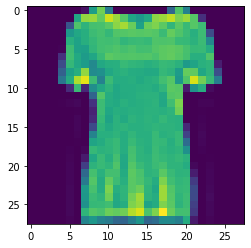

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 10

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index,:,:]}')

# Visualize the image
plt.imshow(training_images[index])

In [15]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [72]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=[28,28]), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [73]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
#print(f'input to softmax function: {inputs.numpy()}')
print(f'input to softmax function:'+ str(inputs))

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
#sum = np.sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function:tf.Tensor([[1. 3. 4. 2.]], shape=(1, 4), dtype=float64)
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [74]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1072 - accuracy: 0.6547
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6524 - accuracy: 0.7637
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5760 - accuracy: 0.7911
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5330 - accuracy: 0.8094
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5048 - accuracy: 0.8202


1/1 [==============================] - 0s 15ms/step
PREDICTION LABEL is: 1
LABEL: 1


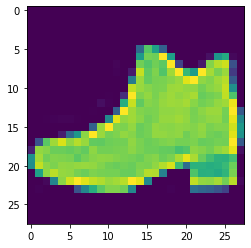

In [79]:
# You can put between 0 to 59999 here
index = 15

prediction = tf.argmax(model.predict(test_images[index][tf.newaxis,:]),axis = -1)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'PREDICTION LABEL is: {prediction[0]}')
print(f'LABEL: {test_labels[index]}')
#print(f'\nIMAGE PIXEL ARRAY:\n {test_images[index,:,:]}')

# Visualize the image
plt.imshow(training_images[index])

In [77]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 851us/step - loss: 0.5168 - accuracy: 0.8153


[0.5167725682258606, 0.8152999877929688]

In [78]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 759us/step
[1.26491739e-06 2.05977067e-08 5.97022563e-06 1.27333715e-05 1.28984911e-05 1.41773596e-01 2.40884783e-05 3.56418431e-01 7.27575924e-03 4.94475216e-01]


In [33]:
print(test_labels[0])

9


In [39]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1838 - accuracy: 0.9448
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0737 - accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0338 - accuracy: 0.9890
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0729 - accuracy: 0.9807
[1.7530648e-10 4.5163845e-10 6.1858785e-08 6.5245857e-08 3.2438854e-17 1.3861962e-10 3.8395685e-14 9.9999976e-01 6.8492489e-11 1.0152465e-10]
7


In [41]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #Try removing this layer
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2943 - accuracy: 0.9178
Epoch 2/5
1875/1875 [==============================] - 2s 964us/step - loss: 0.1428 - accuracy: 0.9588
Epoch 3/5
1875/1875 [==============================] - 2s 830us/step - loss: 0.1053 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 1s 768us/step - loss: 0.0831 - accuracy: 0.9750
Epoch 5/5
313/313 [==============================] - 0s 507us/step - loss: 0.0866 - accuracy: 0.9740
[9.3295539e-06 1.3225754e-09 4.4508365e-06 3.6535825e-04 1.2516592e-09 4.2461730e-07 5.8743552e-11 9.9951816e-01 9.0556183e-05 1.1623857e-05]
7


In [43]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 2s 920us/step - loss: 0.3081
Epoch 2/5
1875/1875 [==============================] - 2s 863us/step - loss: 0.1525
Epoch 3/5
1875/1875 [==============================] - 2s 803us/step - loss: 0.1110
Epoch 4/5
1875/1875 [==============================] - 2s 837us/step - loss: 0.0876
Epoch 5/5
313/313 [==============================] - 0s 587us/step - loss: 0.0954
[2.7610861e-06 4.1552465e-08 8.8647750e-05 1.3223658e-03 2.8996441e-09 6.6854268e-06 1.9203502e-12 9.9855739e-01 1.0055812e-06 2.1057815e-05]
7


In [44]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), # Add a layer here,
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)# Add a layer here
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1980
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0834
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0582
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0452
Epoch 5/5
313/313 [==============================] - 0s 603us/step - loss: 0.0899
[2.1093101e-10 2.2512552e-09 2.0254533e-10 1.2334150e-06 3.3245684e-10 7.6924073e-10 3.1695187e-14 9.9999762e-01 1.6085641e-10 1.1638637e-06]
7


In [46]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=15) # Experiment with the number of epochs

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/15
1875/1875 [==============================] - 2s 754us/step - loss: 0.2583 - accuracy: 0.9260
Epoch 2/15
1875/1875 [==============================] - 1s 779us/step - loss: 0.1124 - accuracy: 0.9678
Epoch 3/15
1875/1875 [==============================] - 1s 746us/step - loss: 0.0768 - accuracy: 0.9765
Epoch 4/15
1875/1875 [==============================] - 2s 805us/step - loss: 0.0585 - accuracy: 0.9816
Epoch 5/15
1875/1875 [==============================] - 2s 819us/step - loss: 0.0442 - accuracy: 0.9868
Epoch 6/15
1875/1875 [==============================] - 1s 762us/step - loss: 0.0351 - accuracy: 0.9891
Epoch 7/15
1875/1875 [==============================] - 1s 728us/step - loss: 0.0289 - accuracy: 0.9913
Epoch 8/15
1875/1875 [==============================] - 1s 728us/step - loss: 0.0225 - accuracy: 0.9930
Epoch 9/15
1875/1875 [==============================] - 1s 756us/step - loss: 0.0186 - accuracy: 0.9937
Epoch 10/15
1875/1875 [==============================] - 1s 730u

In [47]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.6681
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3272
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2902
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2735
Epoch 5/5
313/313 [==============================] - 0s 712us/step - loss: 0.3053
[0.0000000e+00 5.3149867e-26 8.9908426e-27 5.3964368e-20 7.7770692e-27 0.0000000e+00 0.0000000e+00 1.0000000e+00 3.3803581e-33 1.8365447e-25]
7


In [80]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.95): # Experiment with changing this value
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4776 - accuracy: 0.8287
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3587 - accuracy: 0.8681
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3210 - accuracy: 0.8821
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.8896
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2777 - accuracy: 0.8962
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2645 - accuracy: 0.9024
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2512 - accuracy: 0.9060
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2409 - accuracy: 0.9092
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2312 - accuracy: 0.9137
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.220

In [81]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 0s 1ms/step
[1.6409827e-17 1.5614840e-15 8.5756358e-16 9.8620888e-19 4.9828078e-18 8.9345627e-07 1.7316365e-14 1.3654892e-04 1.3122399e-16 9.9986255e-01]
9
